In [1]:
import glob
import os
import random
from collections import Counter

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io as io
from PIL import Image

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
frames = glob.glob('/root/data/phytoplankton/raw/*/*/*.jpg')
print("Total number of frames: {}".format(len(frames)))

Total number of frames: 155349


In [3]:
Counter([f.split('/')[-2] for f in frames]).most_common()

[('artefact_badfocus', 38254),
 ('temporary_t006', 14342),
 ('Phaeocystis_Phaeocystis antarctica', 13691),
 ('not-living_artefact', 13616),
 ('not-living_detritus', 12073),
 ('Phaeocystis_Phaeocystis environmental1', 7540),
 ('other_unicellular', 6165),
 ('Mediophyceae_Chaetoceros', 5103),
 ('Bacillariophyceae_Fragilariopsis', 4945),
 ('Ochrophyta_Bacillariophyta', 3679),
 ('temporary_t016', 3361),
 ('Unknown_Unknown marine', 2689),
 ('Phaeocystis_Phaeocystis environmental2', 2566),
 ('Bacillariophyceae_Nitzschia', 2343),
 ('Bacillariophyta_pennate', 2342),
 ('_living', 2113),
 ('Mediophyceae_Thalassiosira', 1757),
 ('Nitzschia_Nitzschia longissima', 1641),
 ('temporary_t008', 1574),
 ('Fragilariopsis_Fragilariopsis sp.', 1496),
 ('temporary_t002', 958),
 ('Corethrids_Corethron', 878),
 ('Holodinophyta_Dinophyceae', 860),
 ('Dictyocha_Dictyocha speculum', 828),
 ('detritus_fiber', 731),
 ('temporary_t019', 610),
 ('temporary_t001', 557),
 ('Bacillariophyta_centric', 557),
 ('Coscinodis

### frames sizes

In [4]:
random_frames = np.random.choice(frames, 10000)
x = []
y = []
for rf in random_frames:
    image = cv2.imread(rf)
    x.append(image.shape[0])
    y.append(image.shape[1])

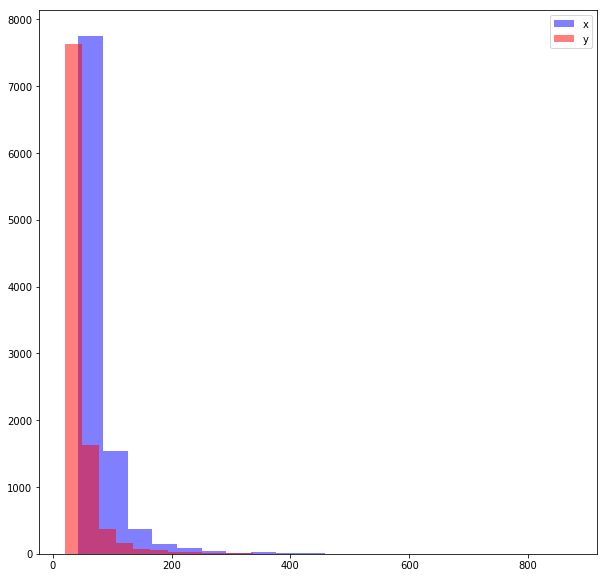

In [5]:
plt.figure(figsize=(10, 10))
plt.hist(x, bins=20, color='b', alpha=0.5)
plt.hist(y, bins=20, color='r', alpha=0.5)
plt.legend(['x', 'y'])
plt.show()

### remove black

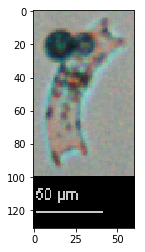

In [6]:
image = cv2.imread(frames[21])# [40:45, :]
plt.imshow(image)
plt.show()

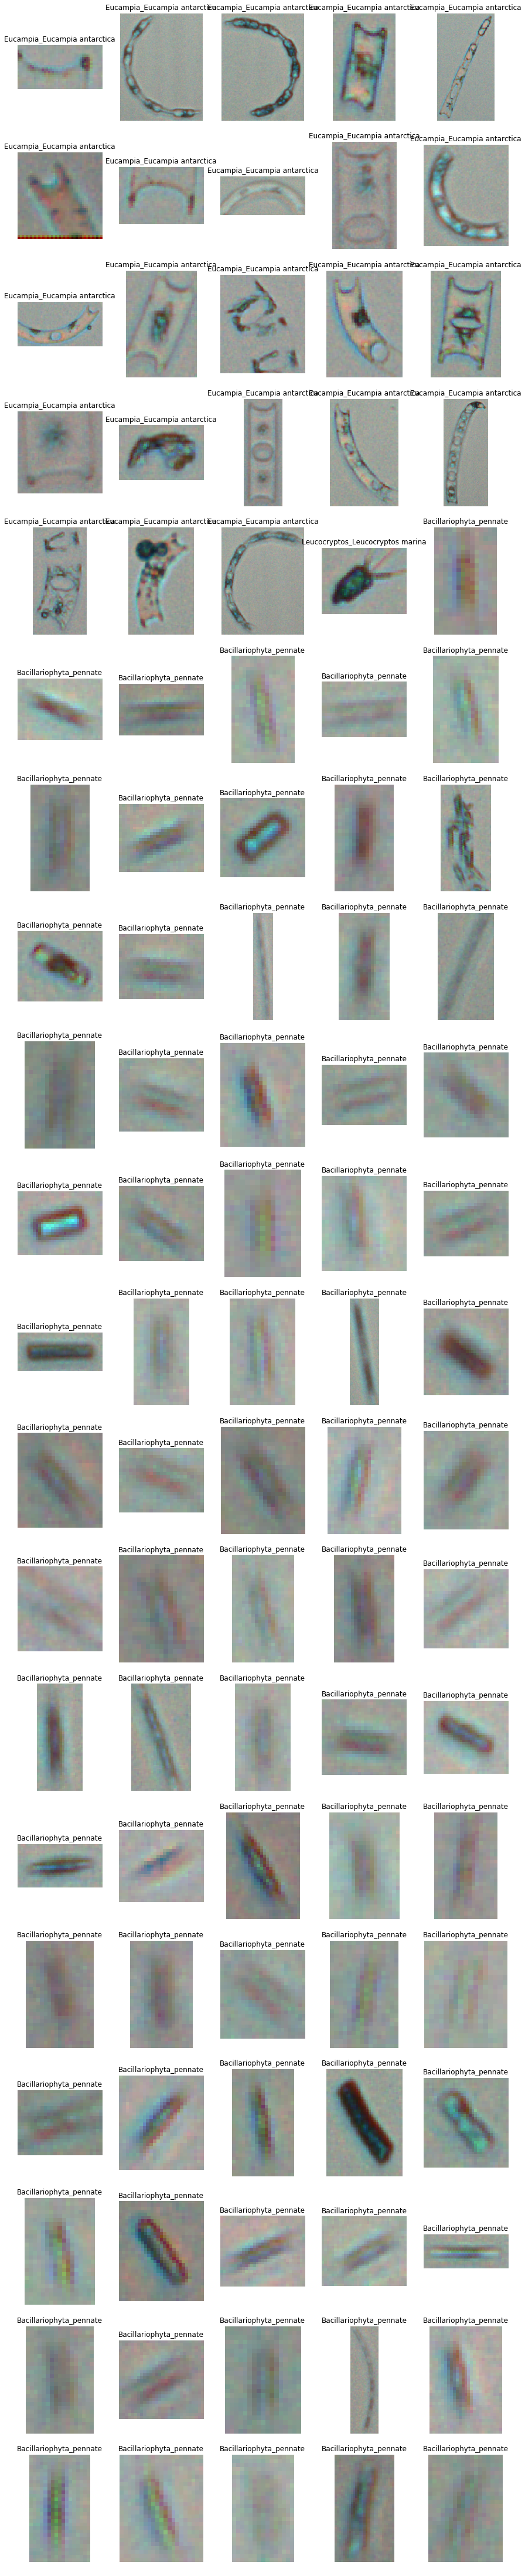

In [8]:
# let's plot 100 images
x = []
y = []
f, ax = plt.subplots(20, 5, figsize=(15, 80))
for k in range(100):
    i = k // 5
    j = k % 5
    image = cv2.imread(frames[k])
    imgsum = np.sum(image, axis=2)
    ind0 = np.where(np.sum(imgsum, axis=1) < 5000)[0]
    ind1 = np.where(np.sum(imgsum, axis=0) < 5000)[0]
    if len(ind0) > 0 and len(ind1) >0:
        new_im = image[:ind0.min(), :ind1.min(), :]
    elif len(ind0) > 0 and len(ind1) == 0:
        new_im = image[:ind0.min(), :, :]
    elif len(ind0) == 0 and len(ind1) > 0:
        new_im = image[:, :ind1.min(), :]
    else:
        new_im = image
    x.append(new_im.shape[0])
    y.append(new_im.shape[1])
    ax[i, j].imshow(new_im)
    ax[i, j].set_title(frames[k].split('/')[-2])
    ax[i, j].axis("off")
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
plt.hist(x, bins=20, color='b', alpha=0.5)
plt.hist(y, bins=20, color='r', alpha=0.5)
plt.legend(['x', 'y'])
plt.show()

## background removal

In [58]:
from tqdm import tqdm

In [60]:
n = 100

In [67]:
bg = np.zeros((64, 64, 3, n), dtype=np.uint8)
for k in tqdm(range(n)):
    image = cv2.imread(frames[k])
    
    imgsum = np.sum(image, axis=2)
    ind0 = np.where(np.sum(imgsum, axis=1) < 5000)[0]
    ind1 = np.where(np.sum(imgsum, axis=0) < 5000)[0]
    if len(ind0) > 0 and len(ind1) >0:
        new_im = image[:ind0.min(), :ind1.min(), :]
    elif len(ind0) > 0 and len(ind1) == 0:
        new_im = image[:ind0.min(), :, :]
    elif len(ind0) == 0 and len(ind1) > 0:
        new_im = image[:, :ind1.min(), :]
    else:
        new_im = image
    test = cv2.fastNlMeansDenoisingColored(new_im)
    img = cv2.resize(test, (64, 64))
    bg[..., k] = img

100%|██████████| 100/100 [00:02<00:00, 37.15it/s]


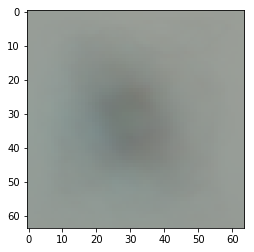

In [68]:
plt.imshow(np.array(np.mean(bg, axis=3), dtype=np.uint8))

In [76]:
np.mean(np.mean(bg, axis=3)[:10, :10, :], axis=0)

array([[151.386, 157.574, 151.793],
       [151.41 , 157.569, 151.819],
       [151.375, 157.523, 151.751],
       [151.27 , 157.385, 151.734],
       [151.104, 157.148, 151.655],
       [150.939, 156.983, 151.342],
       [150.845, 157.031, 151.374],
       [150.715, 157.001, 151.385],
       [150.53 , 156.779, 151.16 ],
       [150.257, 156.421, 150.843]])

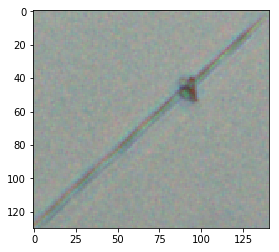

In [51]:
plt.imshow(new_im)
laplacian = cv2.Laplacian(new_im,cv2.CV_64F)

In [54]:
test = cv2.fastNlMeansDenoisingColored(new_im)

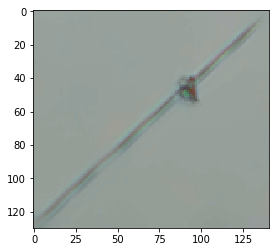

In [55]:
plt.imshow(test)

## detect scale bar

In [ ]:
for f in np.random.choice(frames, 5):
    image = cv2.imread(f)
    imgsum = image.sum(axis=2)
    imgsum[imgsum != 600] = 0
    x, y = np.nonzero(imgsum)
    xmax = x.max()
    ys = [y[i] for i in range(len(y)) if x[i] == xmax]
    print(ys)
    ylength = ys[-1] - ys[0]
    print(ylength)
    plt.imshow(imgsum)
    plt.show()

# More plots

In [ ]:
from tqdm import tqdm

In [ ]:
scalebar = 50

In [ ]:
sizedict = {}
for f in tqdm(frames):
    phytoclass = f.split('/')[-2]
    if phytoclass not in sizedict:
        sizedict[phytoclass] = {}
        sizedict[phytoclass]['x'] = []
        sizedict[phytoclass]['y'] = []
    
    # get the scale bar 
    image = cv2.imread(f)
    imgsum = image.sum(axis=2)
    imgsum[imgsum != 600] = 0
    x, y = np.nonzero(imgsum)
    xmax = x.max()
    ys = [y[i] for i in range(len(y)) if x[i] == xmax]
    pixelscale = ys[-1] - ys[0]
    
    # get the image shape
    image = cv2.imread(f)
    imgsum = np.sum(image, axis=2)
    ind0 = np.where(np.sum(imgsum, axis=1) < 5000)[0]
    ind1 = np.where(np.sum(imgsum, axis=0) < 5000)[0]
    if len(ind0) > 0 and len(ind1) >0:
        new_im = image[:ind0.min(), :ind1.min(), :]
    elif len(ind0) > 0 and len(ind1) == 0:
        new_im = image[:ind0.min(), :, :]
    elif len(ind0) == 0 and len(ind1) > 0:
        new_im = image[:, :ind1.min(), :]
    else:
        new_im = image
    
    sizedict[phytoclass]["x"].append(new_im.shape[0]*scalebar / float(pixelscale))
    sizedict[phytoclass]["y"].append(new_im.shape[1]*scalebar / float(pixelscale))

In [ ]:
for (k, v) in sizedict.items():
    plt.hist(v['x'], density=True)
    plt.hist(v['y'], density=True)
    plt.title(k)
    plt.show()


## object detection 